# 컬러 영상 다루기

In [2]:
import cv2

## 컬러 영상의 픽셀값 참조

In [4]:
src = cv2.imread('./data/butterfly.jpg', cv2.IMREAD_COLOR)
src.shape, src.dtype

((356, 493, 3), dtype('uint8'))

In [8]:
# 좌상단 (0, 0) 좌표의 b 채널 값
b = src[0][0][0]
# 좌상단 (0, 0) 좌표의 g 채널 값
g = src[0][0][1]
# 좌상단 (0, 0) 좌표의 r 채널 값
r = src[0][0][2]
b, g, r

(47, 88, 50)

In [11]:
cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()

* **참고**

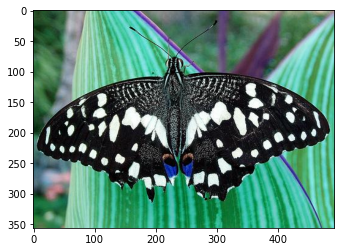

In [12]:
import matplotlib.pyplot as plt
# matplotlib의 default backend : inline
%matplotlib inline
plt.imshow(src) # opencv로 읽은 데이터를 matplotlib으로 표시를 해서 채널이 바뀌었음

In [13]:
# matplotlib의 backend를 qt로 사용하면 "픽셀의 좌표와 RBG 값을 표시해줌"
%matplotlib qt

plt.imshow(src)

## 컬러 영상의 픽셀값 반전

In [15]:
src = cv2.imread('./data/butterfly.jpg', cv2.IMREAD_COLOR)

# option 1
dst = 255 - src

# option 2
# dst[:, :, 0] = 255 - src[:, :, 0]
# dst[:, :, 1] = 255 - src[:, :, 1]
# dst[:, :, 2] = 255 - src[:, :, 2]

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 색공간 변환

In [16]:
src = cv2.imread('./data/butterfly.jpg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY) # 색공간 변환

cv2.imshow('src', src)
cv2.imshow('gray', gray)
cv2.waitKey()
cv2.destroyAllWindows()

## 색상 채널 나누기

**BGR -> HSV**

In [17]:
src = cv2.imread('./data/butterfly.jpg', cv2.IMREAD_COLOR)

# 색공간을 HSV로 변환후에 h, s, v 채널을 각각 윈도우에 표시
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

cv2.imshow('h', h)
cv2.imshow('s', s)
cv2.imshow('v', v)
cv2.waitKey()
cv2.destroyAllWindows()

**BGR -> YCRCB**

In [19]:
src = cv2.imread('./data/butterfly.jpg', cv2.IMREAD_COLOR)

# 색공간을 HSV로 변환후에 h, s, v 채널을 각각 윈도우에 표시
yCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, Cr, Cb = cv2.split(yCrCb)

cv2.imshow('y', y)
cv2.imshow('Cr', Cr)
cv2.imshow('Cb', Cb)
cv2.waitKey()
cv2.destroyAllWindows()

In [28]:
(y == gray).sum(), (y != gray).sum()

(175502, 6)

In [29]:
(v == gray).sum(), (v != gray).sum()

(5646, 169862)

In [31]:
src = cv2.imread('./data/candies.png', cv2.IMREAD_COLOR)

# b, g, r 로 channel을 split 한뒤, 채널마다 윈도웨 표시
b, g, r = cv2.split(src)

cv2.imshow('src', src)
cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)
cv2.waitKey()
cv2.destroyAllWindows()

# 컬러 영상 처리 기법

## 컬러 히스토그램 평활화

In [32]:
# 명암비를 조정한다는것은 "밝기"값하고만 상관이 있음
src = cv2.imread("./data/pepper.bmp")
src_yCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb) # YCrCb : Y(밝기 정보), Cr(붉은색 색상정보), Cb(푸른색 색상정보)

y, Cr, Cb = cv2.split(src_yCrCb)

y_equalized = cv2.equalizeHist(y) # 밝기 정보만을 담고 있는 y 채널에 대해서만 평활화를 수행

dst_yCrCb = cv2.merge([y_equalized, Cr, Cb])

dst = cv2.cvtColor(dst_yCrCb, cv2.COLOR_YCrCb2BGR)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()


## 색상 범위 지정에 의한 영역 분할

**B, G, R 값의 구간 조정하여 영역 분할**

In [ ]:
# picker tool 기준 
# 빨간 m&m : (r, g, b) = (212, 28, 37)
# 초록 m&m : (r, g, b) = (7, 176, 26)

In [39]:
src = cv2.imread('./data/candies.png')

def on_level_change(pos):
    lower_b = cv2.getTrackbarPos('lower b', 'dst')
    upper_b = cv2.getTrackbarPos('upper b', 'dst')
    
    lower_g = cv2.getTrackbarPos('lower g', 'dst')
    upper_g = cv2.getTrackbarPos('upper g', 'dst')
    
    lower_r = cv2.getTrackbarPos('lower r', 'dst')
    upper_r = cv2.getTrackbarPos('upper r', 'dst')
    
    # b, g, r = cv2.split(bgr)

    lower = (lower_b, lower_g, lower_r)
    upper = (upper_b, upper_g, upper_r)

    dst = cv2.inRange(src, lower, upper)
    cv2.imshow('dst', dst)

cv2.imshow('src', src)
cv2.imshow("dst", dst)

# blue channel 조정하는 trackbar
cv2.createTrackbar('lower b', 'dst', 0, 255, on_level_change)
cv2.createTrackbar('upper b', 'dst', 0, 255, on_level_change)

# green channel 조정하는 trackbar
cv2.createTrackbar('lower g', 'dst', 0, 255, on_level_change)
cv2.createTrackbar('upper g', 'dst', 0, 255, on_level_change)

# red channel 조정하는 trackbar
cv2.createTrackbar('lower r', 'dst', 0, 255, on_level_change)
cv2.createTrackbar('upper r', 'dst', 0, 255, on_level_change)



cv2.waitKey()
cv2.destroyAllWindows()            

**H, S, V 값의 구간 조정하여 영역 분할**

In [ ]:
# picker tool 기준 
# 초록 m&m : (h, s, v) = (127, 99, 62)
# h : 125 (0~360)
# s : 99 (0~100)
# v : 62 (0~100)

# opencv 기준
# h : 60 (0~179)
# s : 250 (0~255)
# v : 150 (0~255)


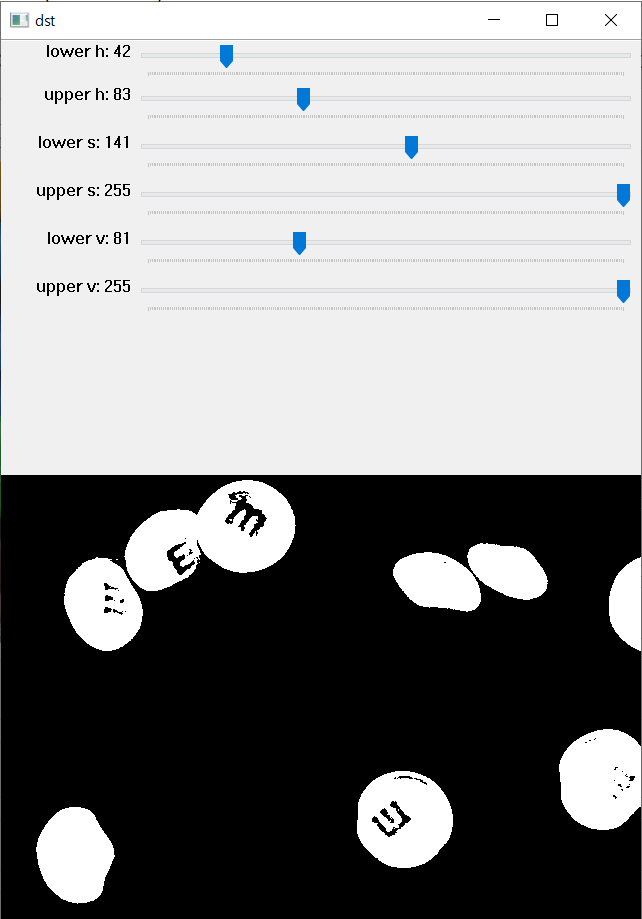

In [45]:
src = cv2.imread('./data/candies.png')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

def on_level_change(pos):
    lower_h = cv2.getTrackbarPos('lower h', 'dst')
    upper_h = cv2.getTrackbarPos('upper h', 'dst')
    
    lower_s = cv2.getTrackbarPos('lower s', 'dst')
    upper_s = cv2.getTrackbarPos('upper s', 'dst')
    
    lower_v = cv2.getTrackbarPos('lower v', 'dst')
    upper_v = cv2.getTrackbarPos('upper v', 'dst')
    
    # b, g, r = cv2.split(bgr)

    lower = (lower_h, lower_s, lower_v)
    upper = (upper_h, upper_s, upper_v)

    dst = cv2.inRange(hsv, lower, upper)
    cv2.imshow('dst', dst)

cv2.imshow('src', src)
cv2.imshow("dst", dst)

# h channel 조정하는 trackbar
cv2.createTrackbar('lower h', 'dst', 0, 179, on_level_change)
cv2.createTrackbar('upper h', 'dst', 0, 179, on_level_change)

# s channel 조정하는 trackbar
cv2.createTrackbar('lower s', 'dst', 0, 255, on_level_change)
cv2.createTrackbar('upper s', 'dst', 0, 255, on_level_change)

# v channel 조정하는 trackbar
cv2.createTrackbar('lower v', 'dst', 0, 255, on_level_change)
cv2.createTrackbar('upper v', 'dst', 0, 255, on_level_change)



cv2.waitKey()
cv2.destroyAllWindows()            

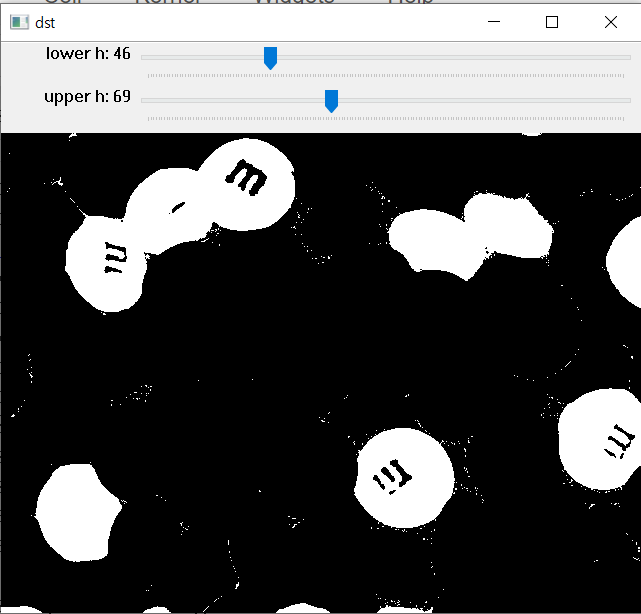

In [46]:
src = cv2.imread('./data/candies.png', cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
def on_level_change(pos):
    lower_h = cv2.getTrackbarPos('lower h', 'dst')
    upper_h = cv2.getTrackbarPos('upper h', 'dst')
    lower = (lower_h, 0, 0)
    upper = (upper_h, 255, 255)
    dst = cv2.inRange(hsv, lower, upper)
    cv2.imshow('dst', dst)
cv2.imshow('src',src)
cv2.imshow('dst',hsv)
cv2.createTrackbar('lower h', 'dst', 0, 179, on_level_change)
cv2.createTrackbar('upper h', 'dst', 0, 179, on_level_change)
cv2.waitKey()
cv2.destroyAllWindows()

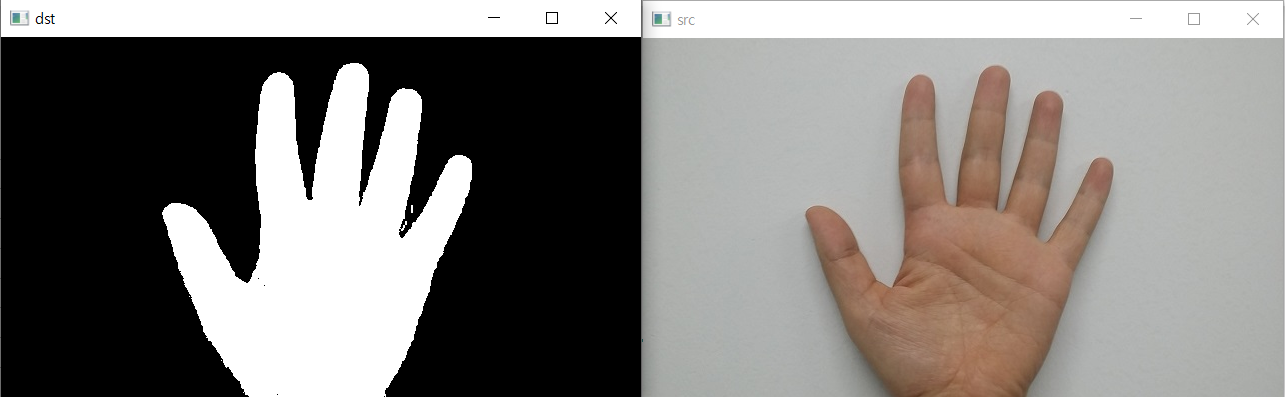

In [47]:
src = cv2.imread("./data/hand.jpg")
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# picker tool 기준 살색의 hsv값
# h : 21 (0~360)
# s : 38 (0~100)
# v : 66 (0~100)

# opencv 기준 hsv 값으로 대략 바꾸면
# h : 10~11 (0~179)
# s : 90~110 (0~255)
# v : 165 (0~255)

lowerb = (0, 20, 0)
upperb = (20, 160, 255)
dst = cv2.inRange(hsv, lowerb, upperb) # dst : lowerb~upperb(흰색), 그외(검은색)


cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 히스토그램 역투영

# 영상의 이진화

## 전역 이진화

## 적응형 이진화

# 모폴로지 연산

## 침식과 팽창

## 열기와 닫기